In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [3]:
def ZCR(input_audio, frames, n_frames, Fs):
  
    
    # Mean justification
    for i in range(n_frames):
        frames[:, i] = frames[:, i] - np.mean(frames[:, i])
    
    # ZCR computation
    zcr = np.sum(np.logical_and(frames[:-1, :] * frames[1:, :] < 0, True), axis=0)
    
    # Plotting
    plt.figure()
    sampleTime = np.arange(1, len(input_audio) + 1) / Fs
    plt.subplot(2, 1, 1)
    plt.plot(sampleTime, input_audio)
    plt.ylabel('Amplitude')
    plt.title('Audio input')
    
    plt.subplot(2, 1, 2)
    plt.plot(zcr, '.-')
    plt.xlabel('sample')
    plt.ylabel('Count')
    plt.title('ZCR')
    
    plt.tight_layout()
    plt.show()

22050


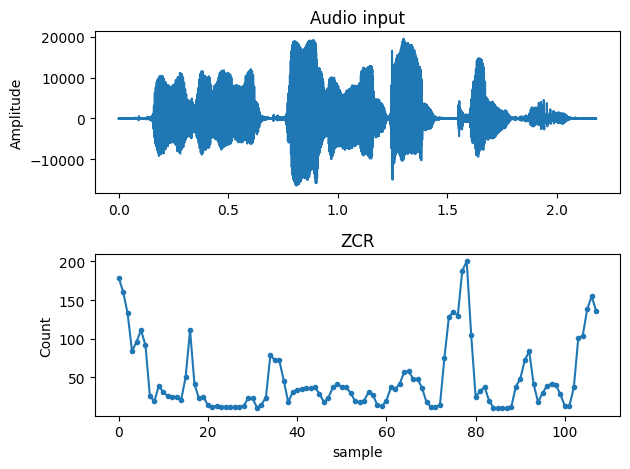

In [5]:
input_audio = './1a.wav'
y, Fs = librosa.load(input_audio)
y = y * (2 ** 15)  # Convert to integer representation
print(Fs)

n_samples = len(y)


frame_length = int(Fs * 0.03)  # 30 ms 
overlap = frame_length // 3
n_frames = (n_samples - overlap) // (frame_length - overlap)

frames = np.zeros((frame_length, n_frames))
for i in range(n_frames):
    start = i * (frame_length - overlap)
    end = start + frame_length
    frames[:, i] = y[start:end]

ZCR(y, frames, n_frames, Fs)

In [11]:
def calculate_short_time_energy(signal, frame_length, hop_length):
    energy = []

    for i in range(0, len(signal) - frame_length + 1, hop_length):
        frame = signal[i:i+frame_length]
        frame_energy = np.sum(frame ** 2)
        energy.append(frame_energy)

    return energy

In [12]:
audio_file = './q5_audio.wav'
signal, sr = librosa.load(audio_file, sr=None)

# Define frame length and hop length in samples (adjust as needed)
frame_length = int(sr * 0.03) 
hop_length = int(sr * 0.01)     


energy = calculate_short_time_energy(signal, frame_length, hop_length)

# Create time axis array
num_frames = len(energy)
time_axis = np.linspace(0, len(signal) / sr, num_frames)

SystemError: initialization of _internal failed without raising an exception

In [13]:
plt.plot(time_axis, energy, label='Short-Time Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy of Speech Signal')
plt.legend()
plt.show()

NameError: name 'time_axis' is not defined